## Combined plots for three real-world datasets (Figure 9)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Sketch-experiments/function_approximation/real-world

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Sketch-experiments/function_approximation/real-world


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
kvals = [5,10]
objs = ['max', 'CES-2', 'square_root']

### Read performance data (see individual notebooks)

In [ ]:
df1 = pd.read_csv('./results/res_score_youtube.csv')
df2 = pd.read_csv('./results/res_score_stackex.csv')
df3 = pd.read_csv('./results/res_score_times.csv')

### Performance ratio plot (Figure 9)

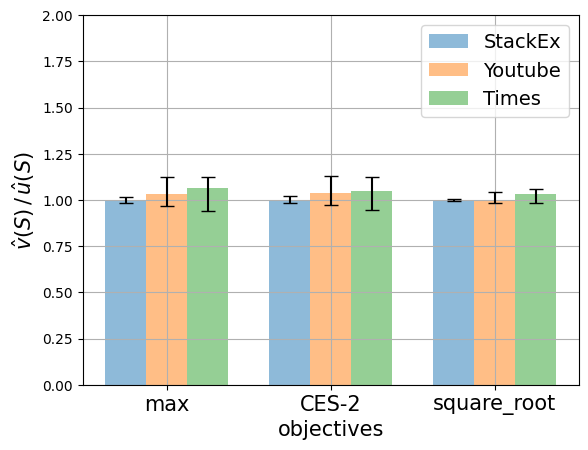

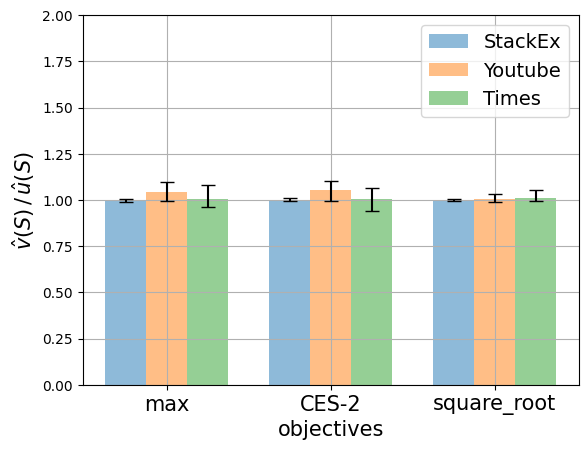

In [ ]:
for i, k in enumerate(kvals):

    fig, ax = plt.subplots(figsize = (6.4*1, 4.8*1))

    x_axis = np.arange(len(objs))
    youtube_median = df1[(df1['k'] == k)& (df1['measure'] == 'view_day')].groupby(['obj'])['ratio_EB'].median()
    stack_median = df2[(df2['k'] == k)& (df2['measure'] == '(2, 8)')].groupby(['obj'])['ratio_EB'].median()
    news_median = df3[(df3['k'] == k)].groupby(['obj'])['ratio_EB'].median()
    youtube_high = df1[(df1['k'] == k)& (df1['measure'] == 'view_day')].groupby(['obj'])['ratio_EB'].quantile(0.75) - youtube_median
    youtube_low = youtube_median - df1[(df1['k'] == k)& (df1['measure'] == 'view_day')].groupby(['obj'])['ratio_EB'].quantile(0.25)
    stack_high = df2[(df2['k'] == k)& (df2['measure'] == '(2, 8)')].groupby(['obj'])['ratio_EB'].quantile(0.75) - stack_median
    stack_low = stack_median - df2[(df2['k'] == k)& (df2['measure'] == '(2, 8)')].groupby(['obj'])['ratio_EB'].quantile(0.25)
    news_high = df3[(df3['k'] == k)].groupby(['obj'])['ratio_EB'].quantile(0.75) - news_median
    news_low = news_median - df3[(df3['k'] == k)].groupby(['obj'])['ratio_EB'].quantile(0.25)

    ax.bar(x_axis, stack_median, yerr= np.vstack([stack_low, stack_high]), capsize=5, label = 'StackEx', width = 0.25,  alpha= 0.5)
    ax.bar(x_axis +0.25, youtube_median, yerr= np.vstack([youtube_low, youtube_high]), capsize=5, label = 'Youtube', width = 0.25,  alpha= 0.5)
    ax.bar(x_axis +0.25*2, news_median, yerr= np.vstack([news_low, news_high]), capsize=5, label = 'Times', width = 0.25, alpha= 0.5)
    # add legends
    ax.legend(fontsize=14)
    ax.grid()
    # set xticks and labels
    ax.set_xticks(x_axis+0.25)
    ax.set_xticklabels(objs, fontsize= 15)
    ax.set_xlabel("objectives", fontsize= 15)
    ax.set_ylabel(r"$\hat{v}(S)\, /\, \hat{u}(S)$", fontsize= 15)
    ax.set_ylim((0, 2))

### ECDF plot (Supplementary figure)

In [ ]:
df1 = pd.read_csv('./stackex_ECDF.csv')
df2 = pd.read_csv('./youtube_ECDF.csv')
df3 = pd.read_csv('./times_ECDF.csv')

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

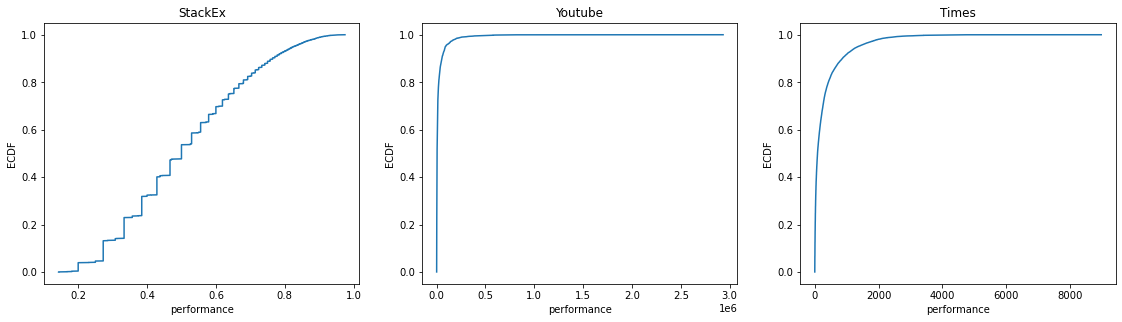

In [ ]:
from itertools import product
fig, axes = plt.subplots(1, 3, figsize = (6.4*3, 4.8*1))
axes[0].plot(ECDF(df1['(2, 8)']).x, ECDF(df1['(2, 8)']).y)
axes[0].set_title("StackEx")
axes[1].plot(ECDF(df2['view_day']).x, ECDF(df2['view_day']).y)
axes[1].set_title("Youtube")
axes[2].plot(ECDF(df3['n_comments']).x, ECDF(df3['n_comments']).y)
axes[2].set_title("Times")
for i in range(3):
    axes[i].set_ylabel("ECDF")
    axes[i].set_xlabel("performance")
plt.show()